**Import Libraries and Dataset**

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
df = sns.load_dataset("penguins")

In [55]:
data=pd.read_csv(r"C:\Users\yadav\OneDrive\Desktop\test jupyter\train.csv")

**Checking Top 5 and Bottom 5 rows of Dataset**

In [56]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Checking Shape of Dataset**

In [4]:
print("No. of Rows :",data.shape[0])
print("No. of Columns :",data.shape[1])

No. of Rows : 891
No. of Columns : 12


**Checking Datatypes of Dataset**

In [5]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Checking NaN values and impute Them**

In [57]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

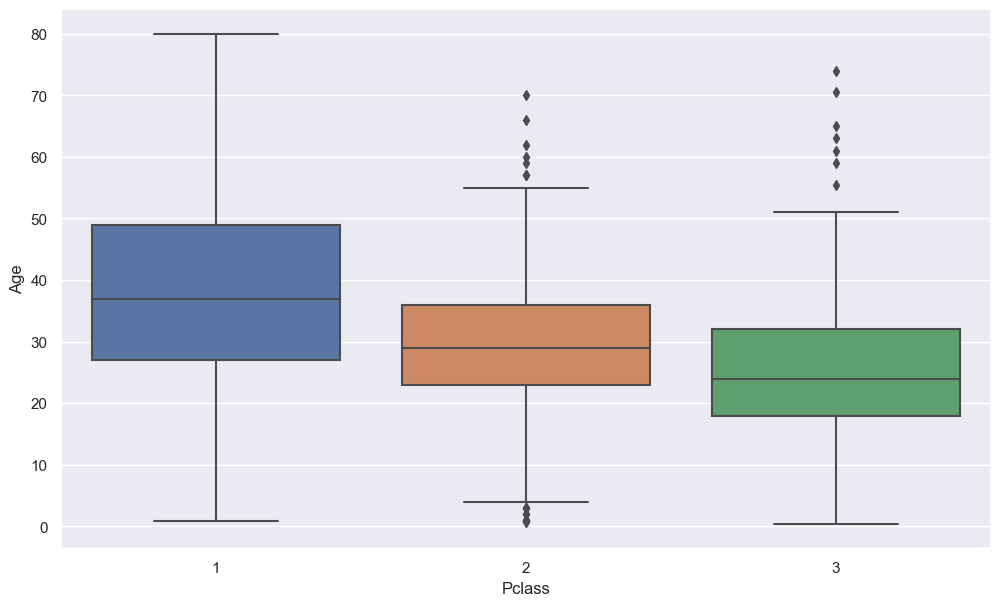

In [58]:
plt.figure(figsize=(12,7))
sns.boxplot(x=data['Pclass'],y=data['Age'],data=data)
plt.show()

In [61]:
def impute_age(cols):
    Age = cols[0]
    Pclass=cols[1]

    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [62]:
data['Age']= data[['Age','Pclass']].apply(impute_age,axis=1)

**Checking Duplicate Data and drop them**

In [63]:
data_dup=data.duplicated().any()
print(data_dup)

False


**Checking Status of Survivance of people in given Dataset**

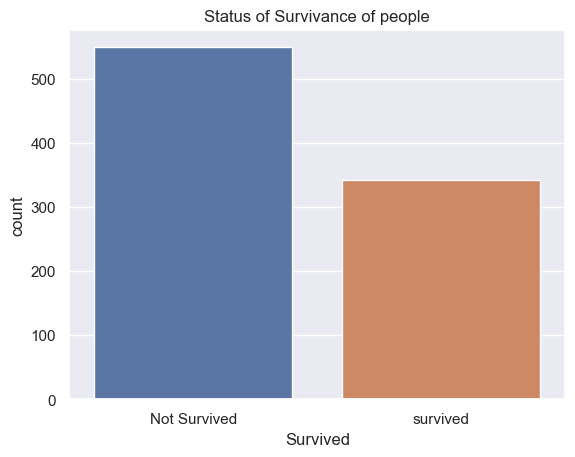

In [64]:
sns.countplot(x=data['Survived'])
plt.xticks([0,1],['Not Survived','survived'])
plt.title("Status of Survivance of people")
plt.show()

In [12]:
data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

**Checking Gender Distribution in Given Dataset**

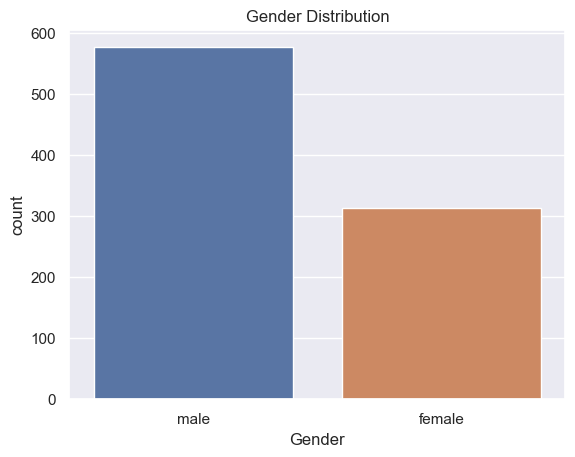

In [13]:
sns.countplot(x=data['Sex'])
plt.xlabel("Gender")
plt.title("Gender Distribution")
plt.show()

In [14]:
data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

**Checking Status of Suvrivance on the basis of Gender**

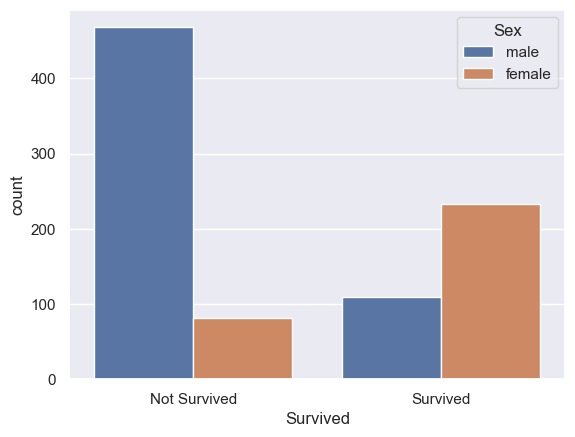

Survived,0,1
Sex,,
female,81,233
male,468,109


In [15]:
sns.countplot(x='Survived',hue='Sex',data=data)
plt.xticks([0,1],['Not Survived','Survived'])
plt.show()
cat= data.groupby("Sex")["Survived"].value_counts().unstack()
cat

**Checking Status of Survivance with respect to Pclass**

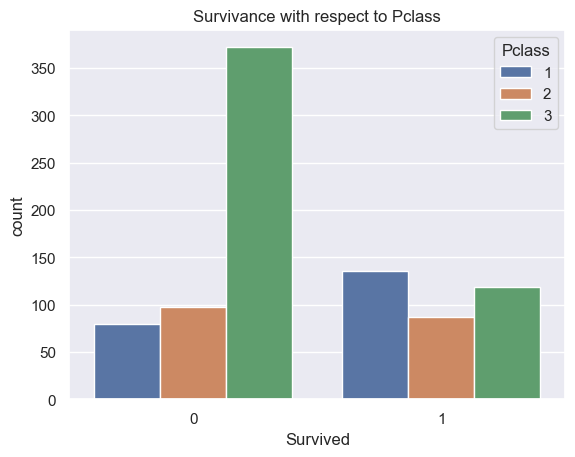

Survived,0,1
Pclass,,
1,80,136
2,97,87
3,372,119


In [16]:
sns.countplot(x='Survived',hue='Pclass',data=data)
plt.title("Survivance with respect to Pclass")
plt.show()
cat= data.groupby("Pclass")["Survived"].value_counts().unstack()
cat

**Checking Status of Survivance with respect to SibSp**

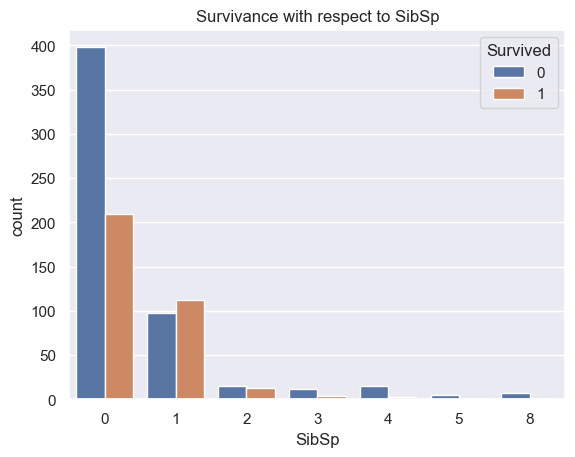

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398.0,97.0,15.0,12.0,15.0,5.0,7.0
1,210.0,112.0,13.0,4.0,3.0,NaN,NaN


In [17]:
sns.countplot(x='SibSp',hue='Survived',data=data)
plt.title("Survivance with respect to SibSp")
plt.show()
cat= data.groupby("Survived")["SibSp"].value_counts().unstack()
cat

**Checking Status of Survivance with respect to Parch**

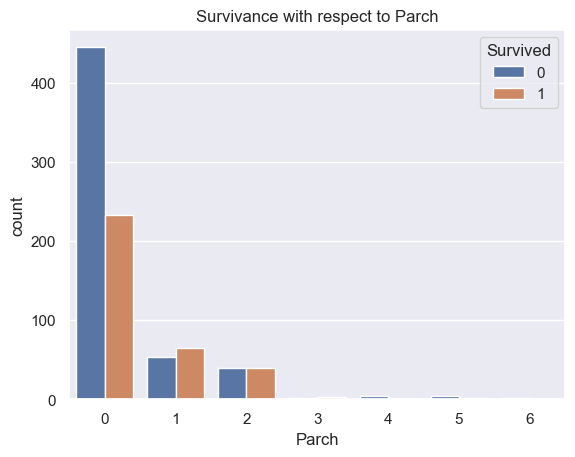

Parch,0,1,2,3,4,5,6
Survived,,,,,,,
0,445.0,53.0,40.0,2.0,4.0,4.0,1.0
1,233.0,65.0,40.0,3.0,NaN,1.0,NaN


In [18]:
sns.countplot(x='Parch',hue='Survived',data=data)
plt.title("Survivance with respect to Parch")
plt.show()
cat= data.groupby("Survived")["Parch"].value_counts().unstack()
cat

**Checking Fare distribution**

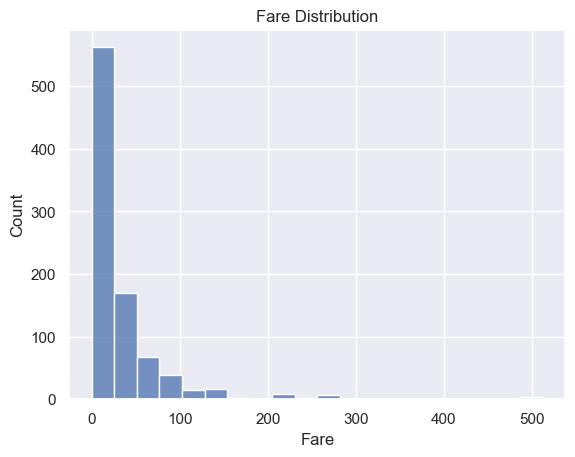

In [19]:
sns.histplot(data['Fare'],bins=20, stat="count",color='b',kde=False)
plt.title("Fare Distribution")
plt.show()

**Checking Age Distribution**

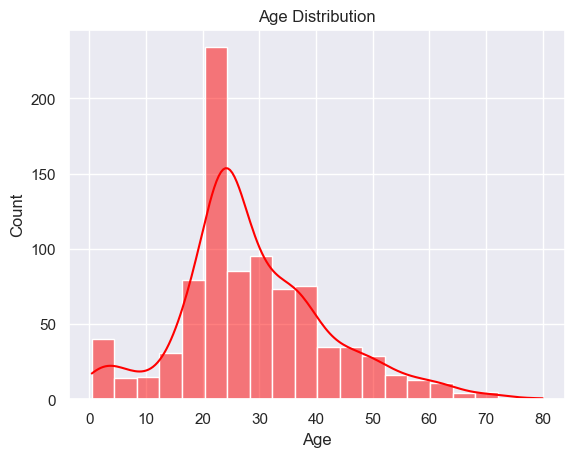

In [20]:
sns.histplot(data['Age'],bins=20, stat="count",color='red',kde=True)
plt.title("Age Distribution")
plt.show()

**Dropping irrelavant Data**

In [65]:
data.drop(['PassengerId','Ticket','Name','Embarked','Cabin','Sex'],axis=1,inplace=True)

**Correlation Matrix**

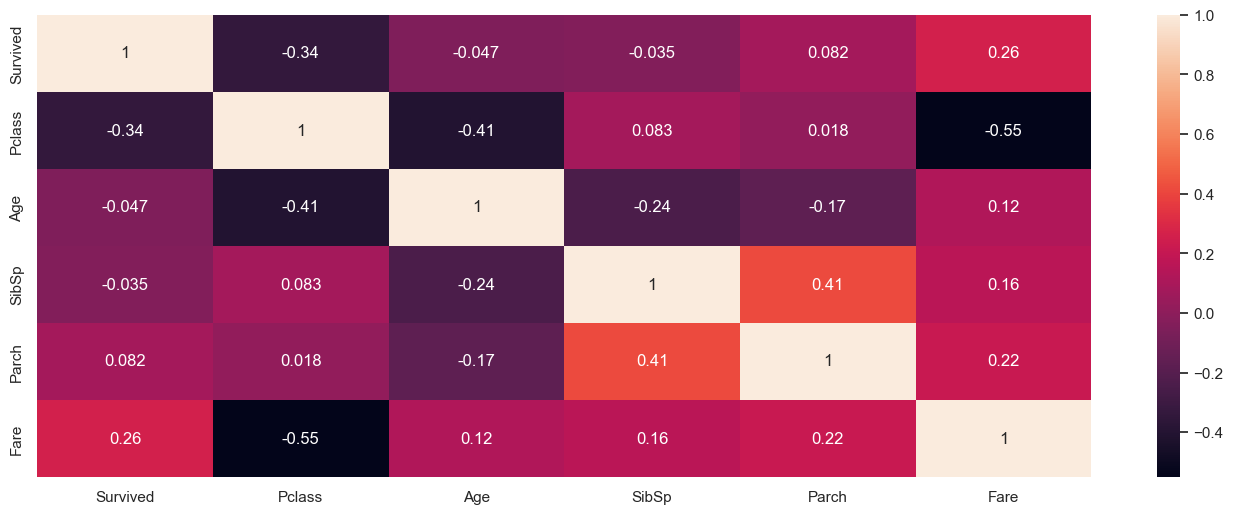

In [67]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)
plt.show()

**Data preprocessing**

In [68]:
cate_val=[]                                   # categorical columns
cont_val=[]                                   # numerical columns

for column in data.columns:
    if data[column].nunique() <=10:           # no of unique values less than 10 then it is categorical value
        cate_val.append(column)
    else:
        cont_val.append(column)

In [69]:
cate_val

['Survived', 'Pclass', 'SibSp', 'Parch']

In [70]:
cont_val

['Age', 'Fare']

**Feature Scalling**

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[cont_val] = sc.fit_transform(data[cont_val])
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,-0.533834,1,0,-0.502445
1,1,1,0.674891,1,0,0.786845
2,1,3,-0.231653,0,0,-0.488854
3,1,1,0.448255,1,0,0.420730
4,0,3,0.448255,0,0,-0.486337


**Encoding of Data**

In [72]:
cate_val.remove('Survived')                           #already contain 0 and 1
data=pd.get_dummies(data,columns=cate_val,drop_first=True)     # remove dummy variable trap

In [73]:
data.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6
0,0,-0.533834,-0.502445,False,True,True,False,False,False,False,False,False,False,False,False,False,False
1,1,0.674891,0.786845,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,1,-0.231653,-0.488854,False,True,False,False,False,False,False,False,False,False,False,False,False,False
3,1,0.448255,0.420730,False,False,True,False,False,False,False,False,False,False,False,False,False,False
4,0,0.448255,-0.486337,False,True,False,False,False,False,False,False,False,False,False,False,False,False


**Spliting Data into training set and test set**

In [130]:
X = data.drop('Survived',axis=1)                 #independent variables
y = data['Survived']                             #dependent variable
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 10)

**Logistic Regression Model**

In [131]:
from sklearn.linear_model import LogisticRegression
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [132]:
y_pred=log.predict(X_test)

In [133]:
from sklearn.metrics import accuracy_score

In [134]:
accuracy_score(y_test,y_pred)

0.7666666666666667

**Support Vectore Machine model**

In [135]:
from sklearn import svm

In [136]:
svm=svm.SVC()

In [137]:
svm.fit(X_train,y_train)

SVC()

In [138]:
y_pred2=svm.predict(X_test)

In [139]:
accuracy_score(y_test,y_pred2)

0.8333333333333334

**KNeighbors Classifier**

In [140]:
from sklearn.neighbors import KNeighborsClassifier

In [141]:
knn=KNeighborsClassifier()

In [142]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [143]:
y_pred3=knn.predict(X_test)

In [144]:
accuracy_score(y_test,y_pred3)

0.7

**Decision Tree Classifier**

In [145]:
from sklearn.tree import DecisionTreeClassifier

In [146]:
dt=DecisionTreeClassifier()

In [147]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [148]:
y_pred4=dt.predict(X_test)

In [149]:
accuracy_score(y_test,y_pred4)

0.6

Random Forest Classifier

In [150]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [151]:
y_pred5=rf.predict(X_test)

In [152]:
accuracy_score(y_test,y_pred5)

0.6333333333333333

**Gradient Boosting Classifier**

In [154]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)


GradientBoostingClassifier()

In [155]:
y_pred6=gbc.predict(X_test)

In [156]:
accuracy_score(y_test,y_pred6)

0.7888888888888889

**Selecting Best Model on Accuracy Score**

In [157]:
final=pd.DataFrame({'Models':['LR','SVM','KNN','DT','RF','GB'],'ACC':[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred2),accuracy_score(y_test,y_pred3),accuracy_score(y_test,y_pred4),accuracy_score(y_test,y_pred5),accuracy_score(y_test,y_pred6)]})
final

,Models,ACC
0,LR,0.766667
1,SVM,0.833333
2,KNN,0.700000
3,DT,0.600000
4,RF,0.633333
5,GB,0.788889


[]

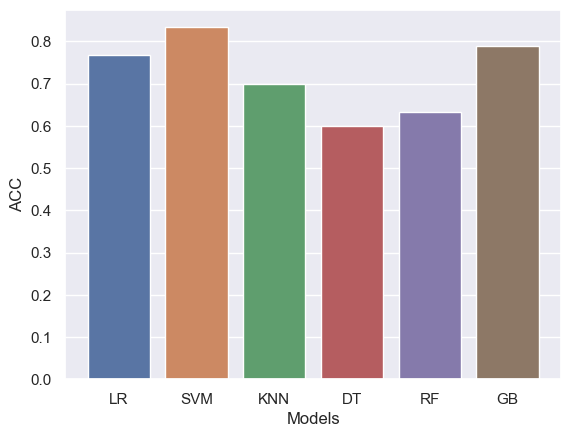

In [158]:
sns.barplot(x=final['Models'],y=final['ACC'])
plt.plot()

In [159]:
X = data.drop('Survived',axis=1)                 #independent variables
y = data['Survived']                             #dependent variable

**Using Support Vector Machine for prediction**

In [160]:
from sklearn import svm
svm=svm.SVC()
svm.fit(X,y)

SVC()

**Prediction on New Data**

In [163]:
new=pd.DataFrame({
    'Pclass':1,
    'Age':37,
    'SibSp':1,	
    'Parch':0,	
    'Fare':71.2833,
},index=[0])

In [162]:
new

,Pclass,Age,SibSp,Parch,Fare
0,1,37,1,0,71.2833


In [164]:
new = new.reindex(columns=X.columns, fill_value=0)
p = svm.predict(new)
if p[0] == 1:
    print("Person is Survived")
else:
    print("Person is not Survived")

Person is Survived
